## Building a convolutional neural network to classify dogs and cats

In [9]:
import os, shutil
#Path to the directory where the original dataset was uncompressed
original_dataset_dir = "dog-cat-dataset/train"
#Directory where you’ll store your smaller dataset
base_dir = "dog-cat-dataset/dog-cat-small"
try:
    os.stat(base_dir)
except:
    os.mkdir(base_dir) 
    
#create directory for training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
try:
    os.stat(train_dir)
except:
    os.mkdir(train_dir) 
    
validation_dir = os.path.join(base_dir, 'validation')
try:
    os.stat(validation_dir)
except:
    os.mkdir(validation_dir) 
    
test_dir = os.path.join(base_dir, 'test')
try:
    os.stat(test_dir)
except:
    os.mkdir(test_dir)

#directroy with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
try:
    os.stat(train_cats_dir)
except:
    os.mkdir(train_cats_dir) 
    
train_dogs_dir = os.path.join(train_dir, 'dogs')
try:
    os.stat(train_dogs_dir)
except:
    os.mkdir(train_dogs_dir) 
    
validation_cats_dir = os.path.join(validation_dir, 'cats')
try:
    os.stat(validation_cats_dir)
except:
    os.mkdir(validation_cats_dir) 
    
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
try:
    os.stat(validation_dogs_dir)
except:
    os.mkdir(validation_dogs_dir) 
    
test_cats_dir = os.path.join(test_dir, 'cats')
try:
    os.stat(test_cats_dir)
except:
    os.mkdir(test_cats_dir) 
    
test_dogs_dir = os.path.join(test_dir, 'dogs')
try:
    os.stat(test_dogs_dir)
except:
    os.mkdir(test_dogs_dir) 

In [2]:
#Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
#Copies the next 500 cat images to validation_cats_dir 
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

#Copies the first 1000 dog images to train_dogs_dir 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#Copies the next 500 dogs images to validation_cats_dir 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#copies the next 500 cat images to test_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

we are done moving the images into the train, test and validation folders.
Now lets check how many pictures we have in each split


In [4]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test cat images: ', len(os.listdir(test_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test cat images:  500


## Instantiating a small convet for dog vs cats classification
We are dealing with a binary classification problem and so we end up with a single unit (Dense layer of size 1) and so we use the sigmoid as last-layer activation and relu for the hidden layers

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) # we choose an input side of 150 by 150
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/Users/online1/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
#lets look at the dimension of the feature maps change with every sucessive  layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## configure the model for training

In [7]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

## data processing
We have to format the data before feeding into our model, we are going to do the following:
- Read the picture file
- Decode the jpeg content to RGB grids of pixels
- convert these into floating-point tensors
- rescale the pixel values (between 0 a,d 255) to the [0, 1] interval
we are going the keras image processing tool

In [10]:
from keras.preprocessing.image import ImageDataGenerator

#Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

#resize all images to 150 X 150
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

## Fitting the model using a batch generator

In [13]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 30,
                              validation_data = validation_generator,
                              validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 143s 1s/step - loss: 0.6906 - acc: 0.5310 - val_loss: 0.6891 - val_acc: 0.5150
Epoch 2/30
100/100 [==============================] - 137s 1s/step - loss: 0.6650 - acc: 0.6065 - val_loss: 0.6594 - val_acc: 0.5850
Epoch 3/30
100/100 [==============================] - 141s 1s/step - loss: 0.6317 - acc: 0.6550 - val_loss: 0.6465 - val_acc: 0.6100
Epoch 4/30
100/100 [==============================] - 139s 1s/step - loss: 0.5862 - acc: 0.6930 - val_loss: 0.6397 - val_acc: 0.6310
Epoch 5/30
100/100 [==============================] - 131s 1s/step - loss: 0.5495 - acc: 0.7140 - val_loss: 0.6116 - val_acc: 0.6640
Epoch 6/30
100/100 [==============================] - 121s 1s/step - loss: 0.5186 - acc: 0.7450 - val_loss: 0.5732 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 120s 1s/step - loss: 0.4802 - acc: 0.7740 - val_loss: 0.5597 - val_acc: 0.7040
Epoch 8/30
100/100 [==============================] - 120s 1s/step - 

## Saving the model

In [14]:
model.save('cats_dogs_small_1.h5')

In [24]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


## Displaying curves of loss and accuracy during training

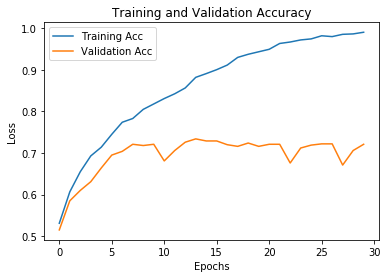

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history_dict['acc'])
plt.plot(history_dict['val_acc'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Acc', 'Validation Acc'], loc='upper left')
plt.show()

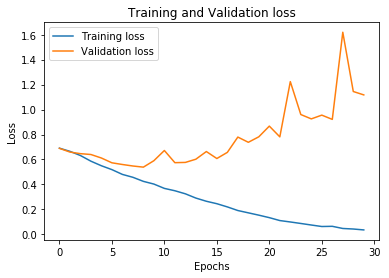

In [17]:
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.

The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

We can see there is overfitting and so we will add some dropout and do some regularization

##  Using data augmentation

In [18]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range =  0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

##  Displaying some randomly augmented training images

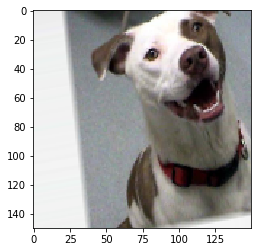

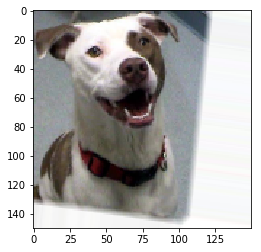

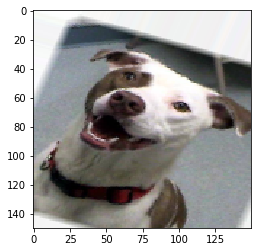

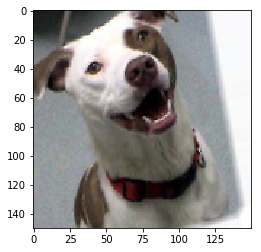

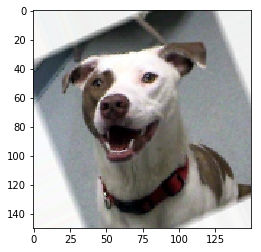

In [19]:
from keras.preprocessing import image

fnames = [os.path.join(train_dogs_dir, fname) for 
          fname in os.listdir(train_dogs_dir)]
#choose one image to augment
img_path = fnames[4]
#reads the image and resizes it
img = image.load_img(img_path, target_size=(150,150))
#converts it to a numpy array shape (150,150, 3)
x = image.img_to_array(img)
#reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

#generates batches of randomly transfromed images. loops indefinitely, so you need to break the loop at some point
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i % 5 == 0:
        break
plt.show()

Voila!!!, our network will never see the same input twice but we have not yet solve the issue of overfitting so we can going to build a know convolutional network by adding dropouts

## Defining a new convnet that includes dropout
Dropouts ranges between 0.1 and 0.5

In [20]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) # we choose an input side of 150 by 150
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#compiling our model
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

## Training the convnet using data-augmentation generators

In [21]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
#validation data shouldn't be augmented
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150), #resizes all images to 150 X 150
    batch_size=32,
    class_mode='binary' #Because you use binary_crossentropy loss, you need binary labels.
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150), #resizes all images to 150 X 150
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## fitting our model

In [22]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 225s 2s/step - loss: 0.6916 - acc: 0.5275 - val_loss: 0.6931 - val_acc: 0.5108
Epoch 2/100
100/100 [==============================] - 240s 2s/step - loss: 0.6821 - acc: 0.5512 - val_loss: 0.6592 - val_acc: 0.6148
Epoch 3/100
100/100 [==============================] - 209s 2s/step - loss: 0.6702 - acc: 0.5700 - val_loss: 0.6521 - val_acc: 0.6047
Epoch 4/100
100/100 [==============================] - 218s 2s/step - loss: 0.6604 - acc: 0.5988 - val_loss: 0.6262 - val_acc: 0.6555
Epoch 5/100
100/100 [==============================] - 223s 2s/step - loss: 0.6474 - acc: 0.6075 - val_loss: 0.6226 - val_acc: 0.6358
Epoch 6/100
100/100 [==============================] - 208s 2s/step - loss: 0.6360 - acc: 0.6378 - val_loss: 0.6005 - val_acc: 0.6739
Epoch 7/100
100/100 [==============================] - 206s 2s/step - loss: 0.6097 - acc: 0.6628 - val_loss: 0.5902 - val_acc: 0.6662
Epoch 8/100
100/100 [==============================] - 209s 2s

100/100 [==============================] - 15359s 154s/step - loss: 0.4397 - acc: 0.7903 - val_loss: 0.5274 - val_acc: 0.7621
Epoch 62/100
100/100 [==============================] - 199s 2s/step - loss: 0.4357 - acc: 0.7997 - val_loss: 0.5016 - val_acc: 0.7728
Epoch 63/100
100/100 [==============================] - 19339s 193s/step - loss: 0.4290 - acc: 0.8009 - val_loss: 0.4611 - val_acc: 0.8039
Epoch 64/100
100/100 [==============================] - 15733s 157s/step - loss: 0.4339 - acc: 0.8022 - val_loss: 0.4850 - val_acc: 0.7760
Epoch 65/100
100/100 [==============================] - 17468s 175s/step - loss: 0.4325 - acc: 0.7975 - val_loss: 0.4519 - val_acc: 0.7855
Epoch 66/100
100/100 [==============================] - 15496s 155s/step - loss: 0.4232 - acc: 0.8022 - val_loss: 0.4931 - val_acc: 0.7709
Epoch 67/100
100/100 [==============================] - 10000s 100s/step - loss: 0.4084 - acc: 0.8206 - val_loss: 0.5631 - val_acc: 0.7468
Epoch 68/100
100/100 [======================

In [ ]:
#saving the model
model.save('cats_and_dogs_small_2.h5')

In [26]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


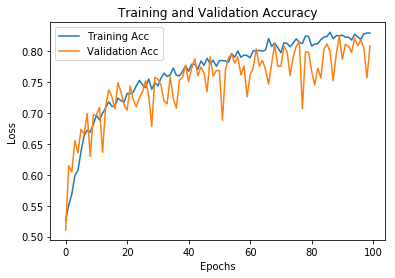

In [27]:
plt.plot(history_dict['acc'])
plt.plot(history_dict['val_acc'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Acc', 'Validation Acc'], loc='upper left')
plt.show()

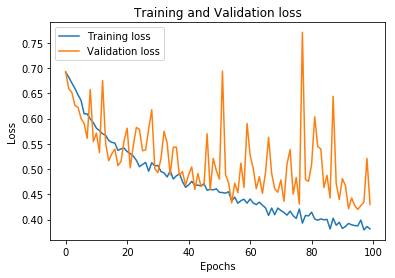

In [28]:
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()

In [39]:
#step 4 - Test model
img = image.load_im('test/24.jpg', target_size=(224,224))
prediction = model.predict(img)

print(prediction)

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_im'